#### Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Basic Graph

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4. ]


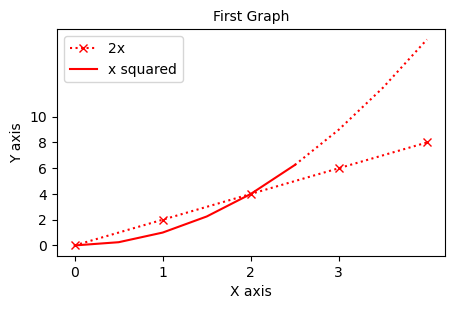

In [2]:
x = [0,1,2,3,4]
y = [0,2,4,6,8]

# Resize the graph

plt.figure(figsize=(5,3), dpi=100)

# Keyword Argument Notation
# plt.plot(x, y, label='2x', color='cyan', linewidth=3, linestyle='--', marker='.', markersize=10)

# Shorthand notation
plt.plot(x, y,'rx:', label='2x')

# Line number 2

x2 = np.arange(0,4.5,0.5)
print(x2)

# Plot part as the line
plt.plot(x2[:6], x2[:6]**2, 'r', label='x squared')
# Remainder part as dot
plt.plot(x2[5:], x2[5:]**2, 'r:')

fontdict = {
    'fontname': 'Times New Roman',
    'fontsize': 10
}
plt.title("First Graph", fontdict=fontdict)
plt.xlabel("X axis", fontdict=fontdict)
plt.ylabel("Y axis", fontdict=fontdict)

plt.xticks([0,1,2,3])
plt.yticks([0,2,4,6,8,10])

plt.legend()

plt.savefig('mygraph.png', dpi=300)
plt.show()

#### Bar charts

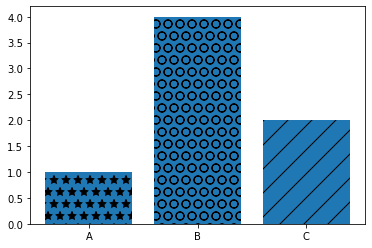

<Figure size 432x288 with 0 Axes>

In [3]:
labels = ['A', 'B', 'C']
values = [1, 4, 2]


bars = plt.bar(labels, values)

patterns = ['/', 'O', '*']

for bar in bars:
    bar.set_hatch(patterns.pop())
# Set hatches
# bars[0].set_hatch('/')
# bars[1].set_hatch('O')
# bars[2].set_hatch('*')


plt.figure(figsize=(6,4))

plt.show()

## Real world examples

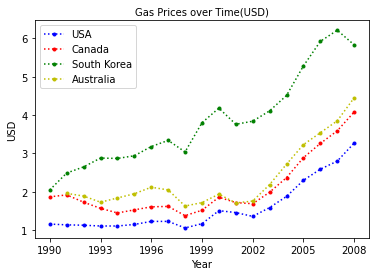

In [4]:
gas = pd.read_csv('gas_prices.csv')

plt.title('Gas Prices over Time(USD)', fontdict=fontdict)

plt.xticks(gas.Year[::3])

plt.plot(gas.Year, gas.USA, 'b.:', label='USA')
plt.plot(gas.Year, gas.Canada, 'r.:', label='Canada')
plt.plot(gas.Year, gas['South Korea'], 'g.:', label='South Korea')
plt.plot(gas.Year, gas.Australia, 'y.:', label='Australia')

plt.xlabel('Year', fontdict=fontdict)
plt.ylabel('USD', fontdict=fontdict)

plt.legend()

plt.show()

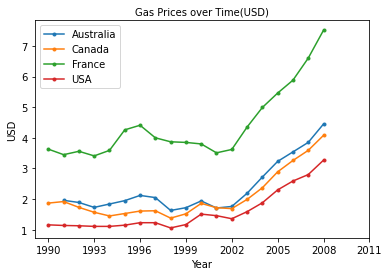

In [5]:
plt.title('Gas Prices over Time(USD)', fontdict=fontdict)

plt.xticks(gas.Year[::3])

country_filter = ['Australia', 'Canada', 'France', 'USA']

for country in country_filter:
    if country != 'Year':
        plt.plot(gas.Year, gas[country], marker='.', label=country)

plt.xlabel('Year', fontdict=fontdict)
plt.ylabel('USD', fontdict=fontdict)

plt.xticks(gas.Year[::3].tolist()+[2011])

# plt.legend(loc='upper center', bbox_to_anchor=(1.2,1),
#           ncol=1, fancybox=True, shadow=True)
plt.legend()

plt.savefig('Gas prices.png', dpi=300)
plt.show()

#### Load Fifa Data

In [6]:
fifa = pd.read_csv('fifa_data.csv')

fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


#### Histograms

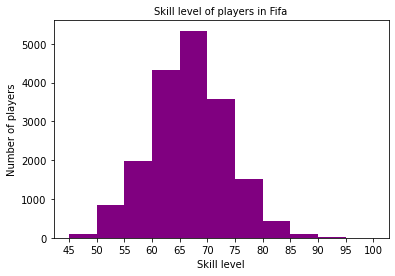

In [7]:
bins = []
for i in range(45,101,5):
    bins.append(i)

plt.hist(fifa.Overall, bins=bins, color='purple')
plt.xticks(bins)
plt.ylabel('Number of players', fontdict=fontdict)
plt.xlabel('Skill level', fontdict=fontdict)
plt.title('Skill level of players in Fifa', fontdict=fontdict)

plt.show()

#### Pie Chart

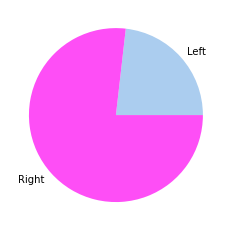

In [8]:
from turtle import color


left = fifa.loc[fifa['Preferred Foot']=='Left'].count()[0]
right = fifa.loc[fifa['Preferred Foot']=='Right'].count()[0]

labels = ['Left', 'Right']
colors = ['#abcdef', '#fe4ef6']
plt.pie([left, right], labels=labels, colors=colors)

plt.show()

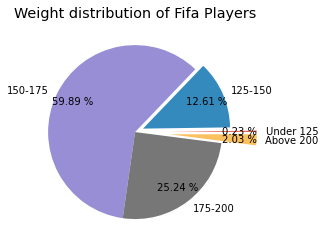

In [30]:
from logging.config import dictConfig
from tokenize import Expfloat


fifa.Weight = [int(x.strip('lbs')) if type(x)==str else x for x in fifa.Weight]

plt.style.use('ggplot')

light = fifa.loc[fifa.Weight < 125].count()[0]
light_medium = fifa.loc[(fifa.Weight >= 125) & (fifa.Weight<150)].count()[0]
medium = fifa.loc[(fifa.Weight >= 150) & (fifa.Weight<175)].count()[0]
medium_heavy = fifa.loc[(fifa.Weight >= 175) & (fifa.Weight<200)].count()[0]
heavy = fifa.loc[fifa.Weight>200].count()[0]

weights = [light, light_medium, medium, medium_heavy, heavy]
labels = ['Under 125', '125-150', '150-175', '175-200', 'Above 200']
explode = (0.4,0.1,0,0,0.4)

plt.title('Weight distribution of Fifa Players')
plt.pie(weights, labels=labels, autopct='%.2f %%', pctdistance=0.8, explode=explode)

plt.show()

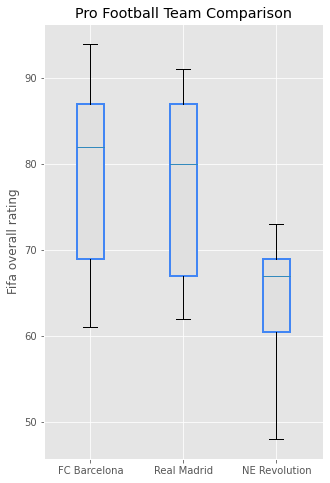

In [49]:
barcelona = fifa.loc[fifa.Club == 'FC Barcelona']['Overall']
madrid = fifa.loc[fifa.Club == 'Real Madrid']['Overall']
revs = fifa.loc[fifa.Club == 'New England Revolution']['Overall']

plt.figure(figsize=(5, 8))

labels = ['FC Barcelona', 'Real Madrid', 'NE Revolution']

boxes = plt.boxplot([barcelona, madrid, revs], labels=labels, patch_artist=True)
for box in boxes['boxes']:
    # set edge color
    box.set(color='#4286f4', linewidth=2)

    # Change fill color
    box.set(facecolor='#e0e0e0')
plt.title("Pro Football Team Comparison")
plt.ylabel('Fifa overall rating')
plt.show()